In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-05-29 145732.png to Screenshot 2025-05-29 145732.png
Saving Screenshot 2025-05-29 145744.png to Screenshot 2025-05-29 145744.png
Saving Screenshot 2025-05-29 145756.png to Screenshot 2025-05-29 145756.png
Saving Screenshot 2025-05-29 145810.png to Screenshot 2025-05-29 145810.png
Saving Screenshot 2025-05-29 145822.png to Screenshot 2025-05-29 145822.png
Saving Screenshot 2025-05-29 145835.png to Screenshot 2025-05-29 145835.png
Saving Screenshot 2025-05-29 145844.png to Screenshot 2025-05-29 145844.png
Saving Screenshot 2025-05-29 145913.png to Screenshot 2025-05-29 145913.png
Saving Screenshot 2025-05-29 145929.png to Screenshot 2025-05-29 145929.png
Saving Screenshot 2025-05-29 151114.png to Screenshot 2025-05-29 151114.png
Saving Screenshot 2025-05-29 151416.png to Screenshot 2025-05-29 151416.png
Saving Screenshot 2025-05-29 151424.png to Screenshot 2025-05-29 151424.png
Saving Screenshot 2025-05-29 151436.png to Screenshot 2025-05-29 151436.png
Saving Scree

In [19]:
import os
from google.colab import files
from PIL import Image

# 📁 Create a directory to save images
os.makedirs("images", exist_ok=True)

# ✅ Upload and save images to "images/" folder
uploaded = files.upload()
for fname in uploaded.keys():
    img = Image.open(fname).convert("RGB")
    img.save(f"images/{fname}")


Saving Screenshot 2025-05-29 145732.png to Screenshot 2025-05-29 145732 (1).png
Saving Screenshot 2025-05-29 145744.png to Screenshot 2025-05-29 145744 (1).png
Saving Screenshot 2025-05-29 145756.png to Screenshot 2025-05-29 145756 (1).png
Saving Screenshot 2025-05-29 145810.png to Screenshot 2025-05-29 145810 (1).png
Saving Screenshot 2025-05-29 145822.png to Screenshot 2025-05-29 145822 (1).png
Saving Screenshot 2025-05-29 145835.png to Screenshot 2025-05-29 145835 (1).png
Saving Screenshot 2025-05-29 145844.png to Screenshot 2025-05-29 145844 (1).png
Saving Screenshot 2025-05-29 145913.png to Screenshot 2025-05-29 145913 (1).png
Saving Screenshot 2025-05-29 145929.png to Screenshot 2025-05-29 145929 (1).png
Saving Screenshot 2025-05-29 151114.png to Screenshot 2025-05-29 151114 (1).png
Saving Screenshot 2025-05-29 151416.png to Screenshot 2025-05-29 151416 (1).png
Saving Screenshot 2025-05-29 151424.png to Screenshot 2025-05-29 151424 (1).png
Saving Screenshot 2025-05-29 151436.png 

step 2

In [32]:
class SharpeningDataset(Dataset):
    def __init__(self, image_folder, image_size=128):
        self.image_paths = glob(f"{image_folder}/*.jpg") + glob(f"{image_folder}/*.png")
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor()
        ])

    def __getitem__(self, index):
        img = Image.open(self.image_paths[index]).convert('RGB')
        sharp = self.transform(img)
        # Simulate a blurred version for training
        blurred_img = img.filter(ImageFilter.GaussianBlur(radius=1.5))
        blur = self.transform(blurred_img)
        return blur, sharp

    def __len__(self):
        return len(self.image_paths)

dataset = SharpeningDataset("images", image_size=128)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [33]:
import torch.nn as nn


step 3

In [34]:
# 🧠 Teacher: deeper CNN
class TeacherModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 3, 3, padding=1)
        )

    def forward(self, x):
        return self.net(x)

# 👶 Student: shallower CNN
class StudentModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 16, 3, padding=1), nn.ReLU(),
            nn.Conv2d(16, 3, 3, padding=1)
        )

    def forward(self, x):
        return self.net(x)


In [37]:
import torch.optim as optim
from tqdm import tqdm
from PIL import ImageFilter
!pip install pytorch_msssim  # ✅ Run this only once (if not already)
from pytorch_msssim import ssim





step 4

100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 1/10 - Loss: 2.3804


100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 2/10 - Loss: 1.5104


100%|██████████| 11/11 [00:05<00:00,  2.07it/s]


Epoch 3/10 - Loss: 1.2389


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 4/10 - Loss: 1.0905


100%|██████████| 11/11 [00:05<00:00,  2.13it/s]


Epoch 5/10 - Loss: 0.9653


100%|██████████| 11/11 [00:07<00:00,  1.53it/s]


Epoch 6/10 - Loss: 0.8439


100%|██████████| 11/11 [00:05<00:00,  2.17it/s]


Epoch 7/10 - Loss: 0.8322


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 8/10 - Loss: 0.7925


100%|██████████| 11/11 [00:05<00:00,  1.91it/s]


Epoch 9/10 - Loss: 0.7863


100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Epoch 10/10 - Loss: 0.7319


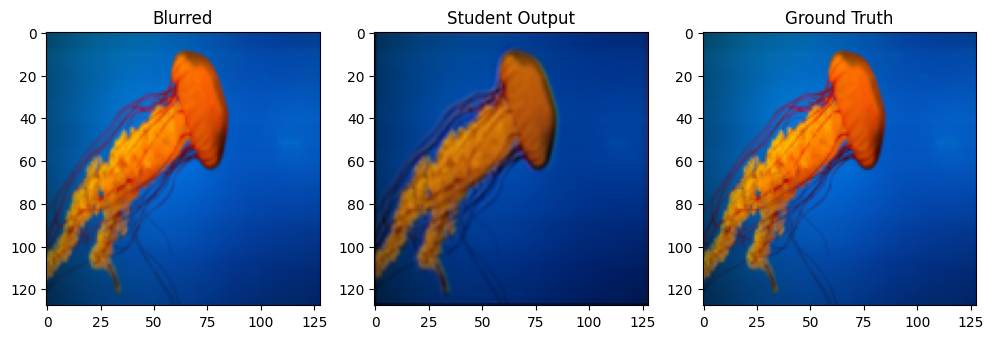

Average SSIM: 0.9202
Average PSNR: 19.00 dB


In [43]:
import numpy as np
import matplotlib.pyplot as plt


def train_model(teacher, student, dataloader, epochs=10, device='cuda'):
    teacher.to(device)
    student.to(device)

    # Freeze teacher
    teacher.eval()
    for param in teacher.parameters():
        param.requires_grad = False

    optimizer = optim.Adam(student.parameters(), lr=1e-3)
    mse = nn.MSELoss()

    for epoch in range(epochs):
        total_loss = 0
        for blur, sharp in tqdm(dataloader):
            blur, sharp = blur.to(device), sharp.to(device)

            with torch.no_grad():
                teacher_output = teacher(blur)

            student_output = student(blur)

            # Losses
            mse_loss = mse(student_output, sharp)
            distill_loss = mse(student_output, teacher_output)
            ssim_loss = 1 - ssim(student_output, sharp, data_range=1.0)

            loss = 0.5 * mse_loss + 0.3 * distill_loss + 0.2 * ssim_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")

# 🔥 Train
teacher = TeacherModel()
student = StudentModel()

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Train the model
train_model(teacher, student, dataloader, epochs=10, device=device)

# ✅ Evaluate the model (separate line)
evaluate(student, dataloader, device=device)


step 5

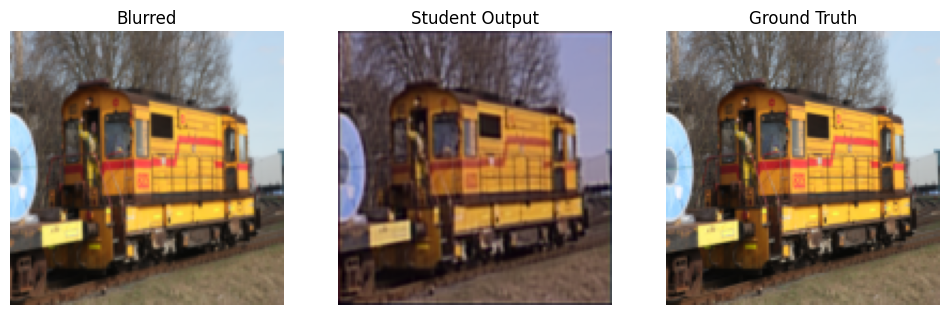

Average SSIM: 0.9209
Average PSNR: 19.19 dB


In [47]:
from pytorch_msssim import ssim
import numpy as np
import matplotlib.pyplot as plt
import torch

def evaluate(model, dataloader, device='cpu'):
    model.eval()
    model.to(device)

    total_ssim, total_psnr, count = 0, 0, 0

    with torch.no_grad():
        for blur, sharp in dataloader:
            blur, sharp = blur.to(device), sharp.to(device)
            output = model(blur)

            # Clamp to [0, 1] just in case
            output = torch.clamp(output, 0, 1)

            # SSIM
            batch_ssim = ssim(output, sharp, data_range=1.0, size_average=True)
            total_ssim += batch_ssim.item()

            # PSNR
            mse_val = torch.mean((output - sharp) ** 2).item()
            psnr = 20 * np.log10(1.0 / (np.sqrt(mse_val) + 1e-8))
            total_psnr += psnr

            # Visualize the first batch
            if count == 0:
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.imshow(blur[0].permute(1, 2, 0).cpu().numpy())
                plt.title("Blurred")
                plt.axis("off")

                plt.subplot(1, 3, 2)
                plt.imshow(output[0].permute(1, 2, 0).cpu().numpy())
                plt.title("Student Output")
                plt.axis("off")

                plt.subplot(1, 3, 3)
                plt.imshow(sharp[0].permute(1, 2, 0).cpu().numpy())
                plt.title("Ground Truth")
                plt.axis("off")

                plt.show()

            count += 1

    avg_ssim = total_ssim / count
    avg_psnr = total_psnr / count

    print(f"Average SSIM: {avg_ssim:.4f}")
    print(f"Average PSNR: {avg_psnr:.2f} dB")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
evaluate(student, dataloader, device=device)

